# Space Stock Portfolio Risk and Returns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Space Stock
title = 'Space'
symbols = ['LORL','SRAC','SRACU','NPA', 'NPAUU', 'SPCE']
start = '2020-02-01'
end = '2021-01-14'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

11

In [7]:
days = (df.index[-1] - df.index[0]).days
days

345

In [8]:
df.head()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2020-02-03,23.481482,9.94,10.26,10.01,10.40,18.610001
2020-02-04,24.179167,9.94,10.21,10.00,10.38,19.690001
2020-02-05,24.346319,9.94,10.21,10.00,10.38,18.690001
2020-02-06,24.942261,9.90,10.22,10.00,10.42,18.520000
2020-02-07,25.145750,9.91,10.25,10.00,10.42,18.930000


In [9]:
df.tail()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2021-01-07,23.410000,16.049999,17.920000,12.78,14.4999,25.129999
2021-01-08,23.270000,16.280001,18.020000,12.69,13.9800,25.219999
2021-01-11,23.830000,15.700000,18.000000,12.52,14.6000,24.920000
2021-01-12,24.230000,16.000000,18.200001,12.70,14.5155,26.660000
2021-01-13,23.219999,17.070000,19.000000,13.35,14.6700,27.559999


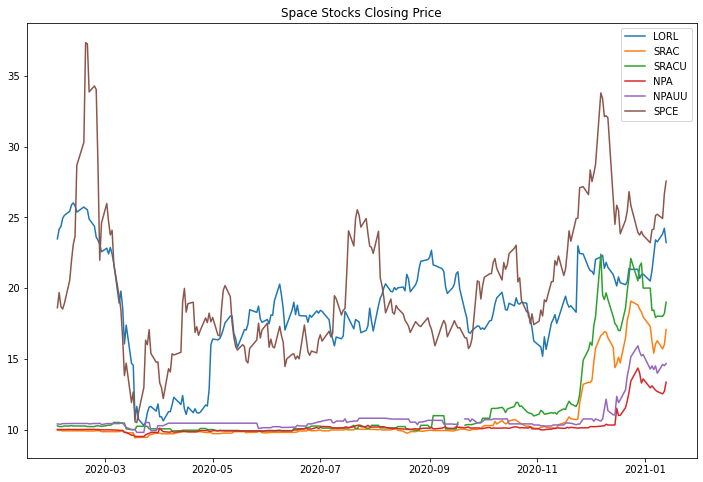

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

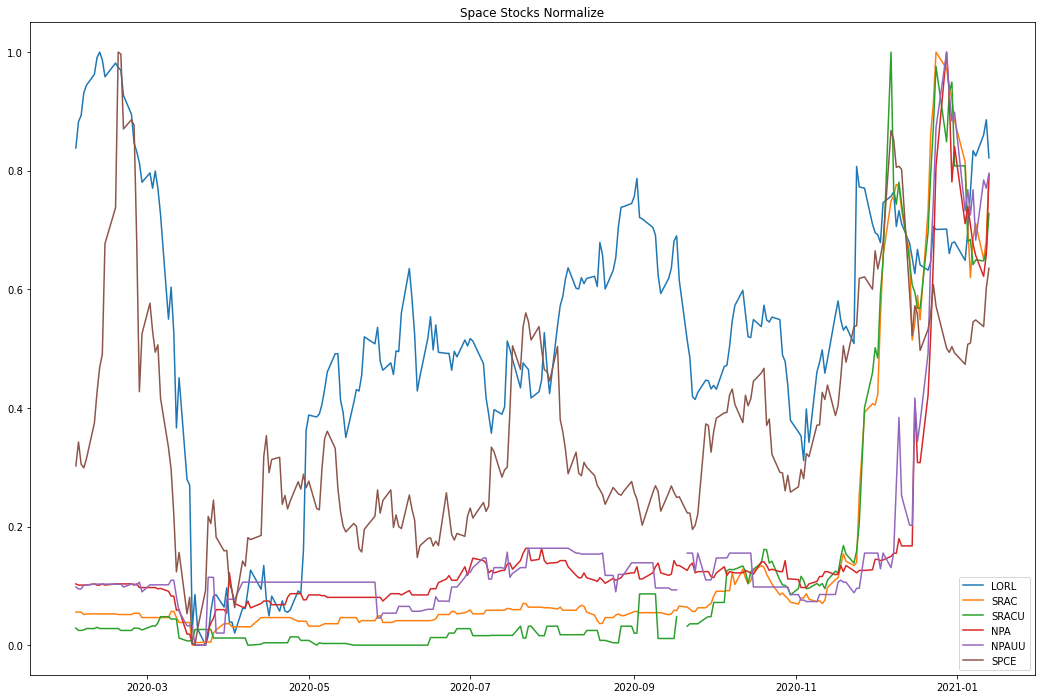

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

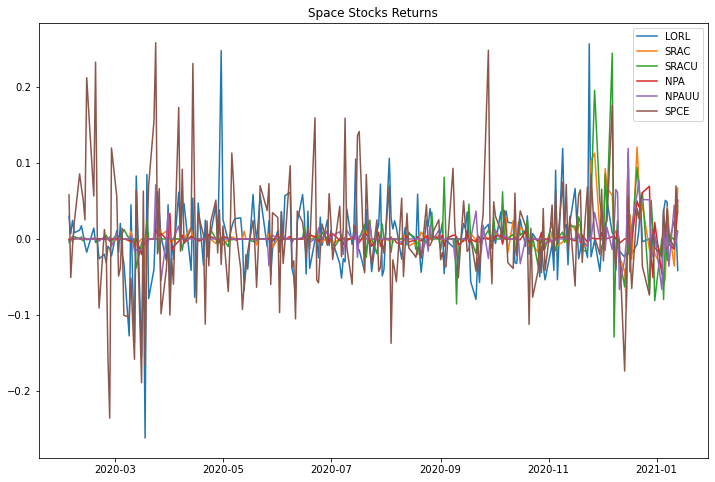

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

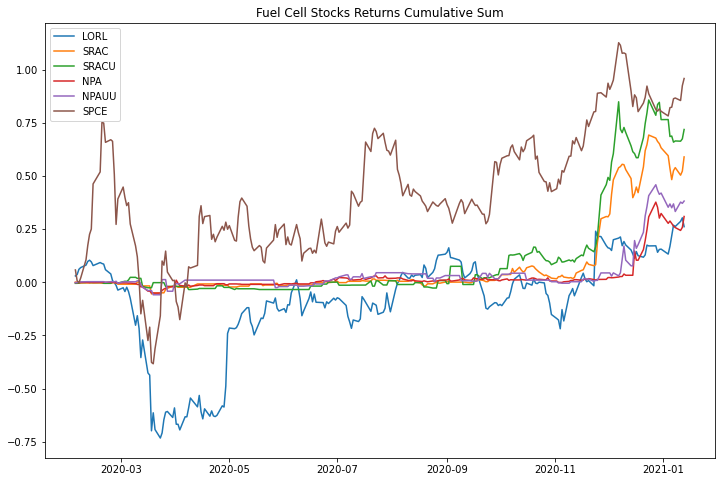

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

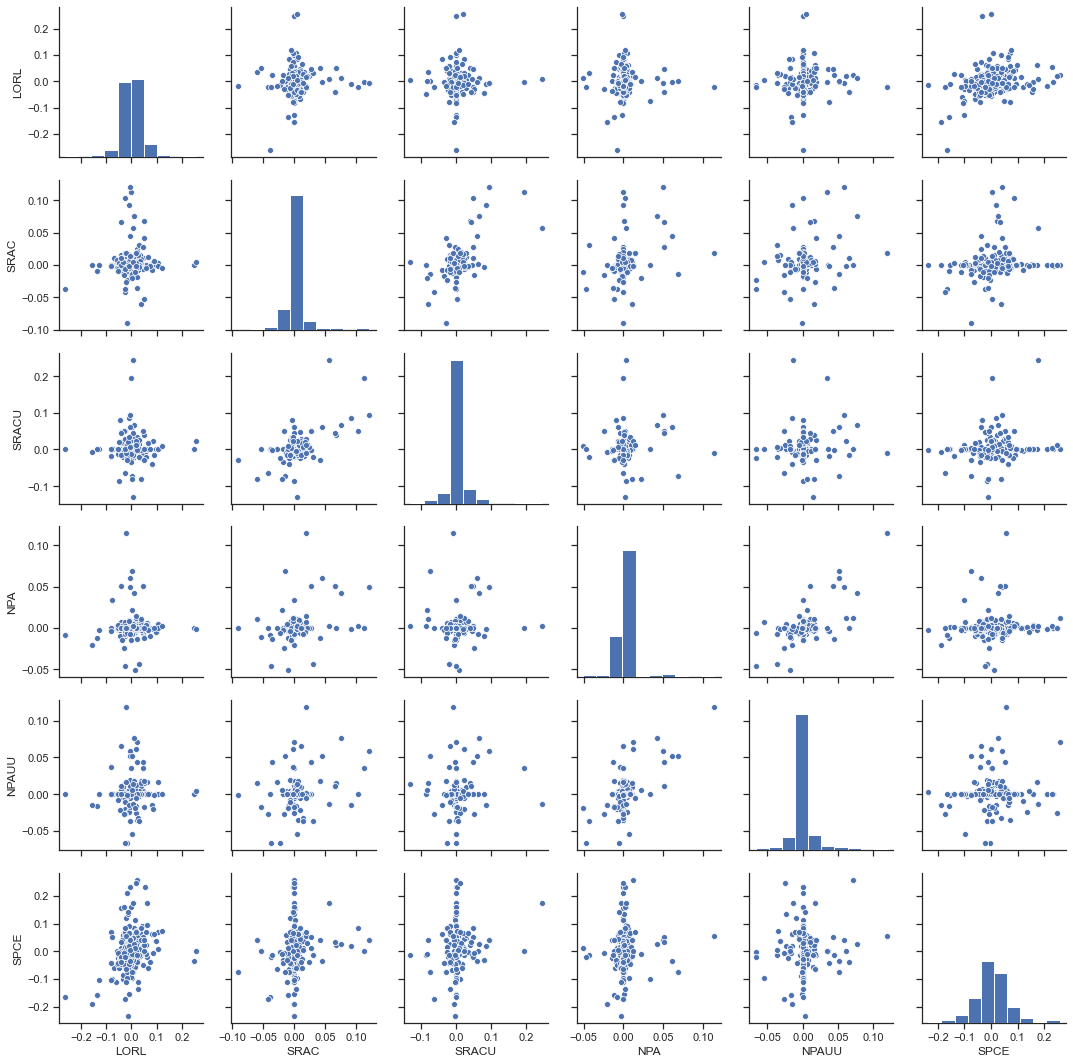

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

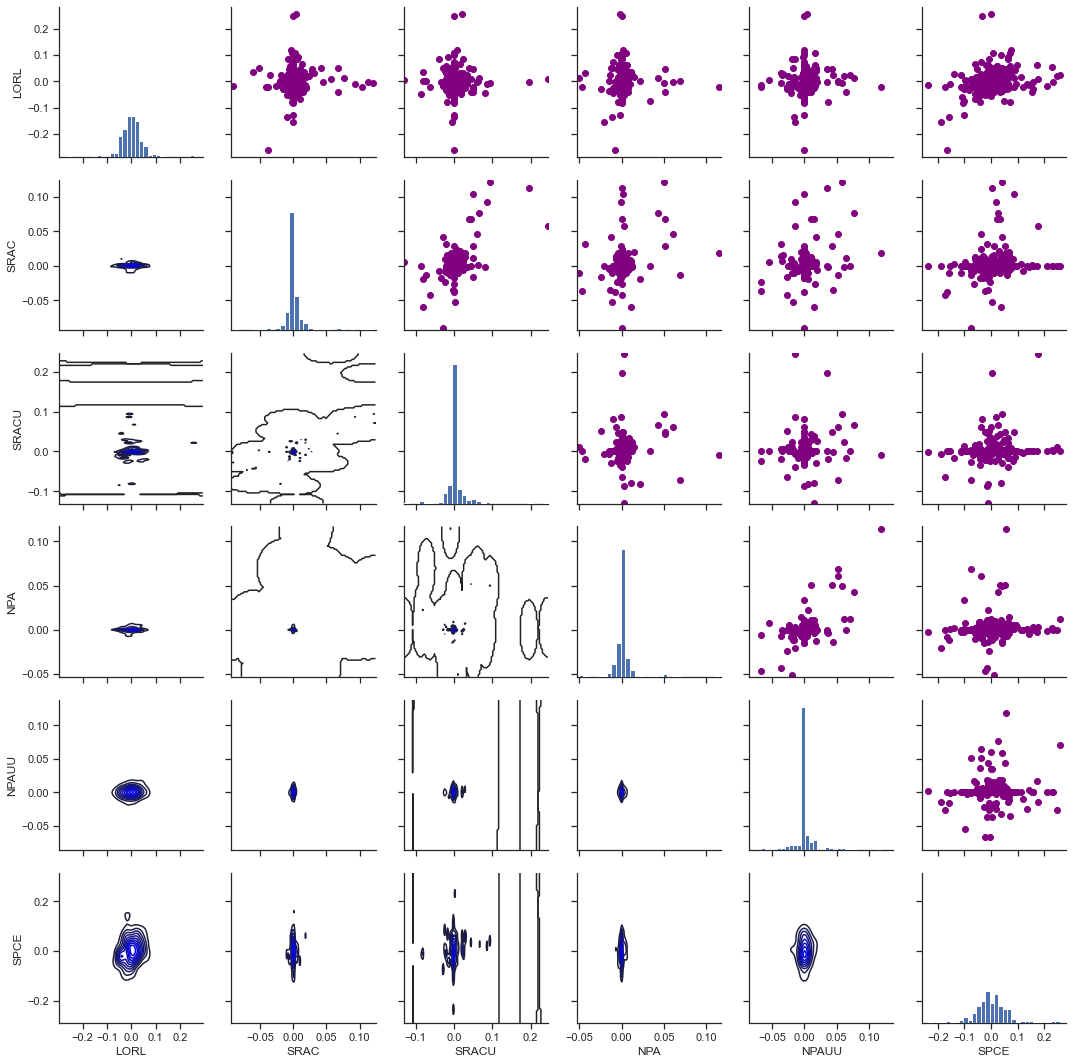

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

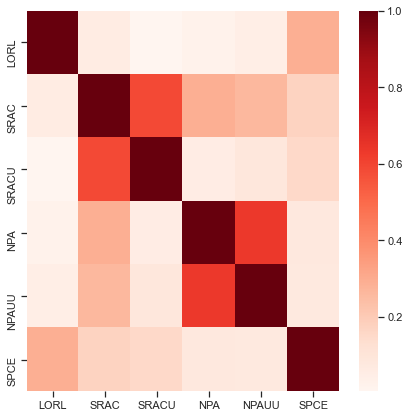

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

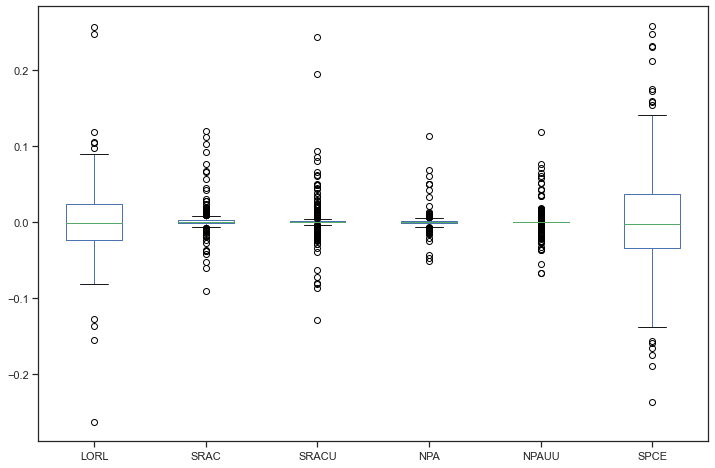

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

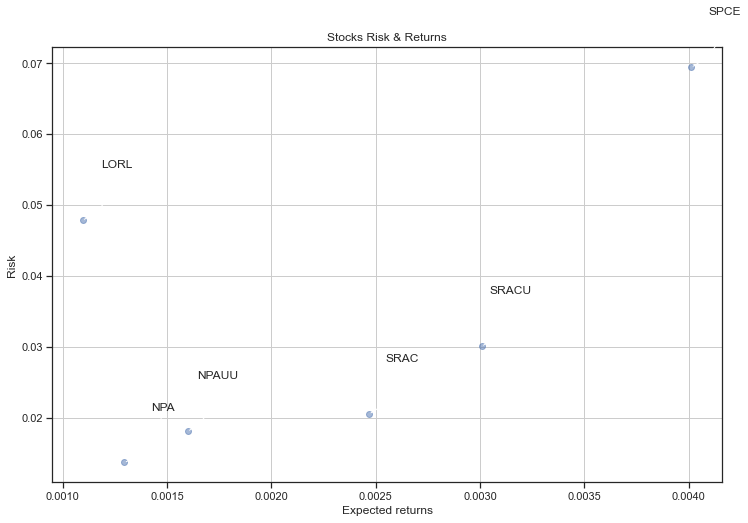

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

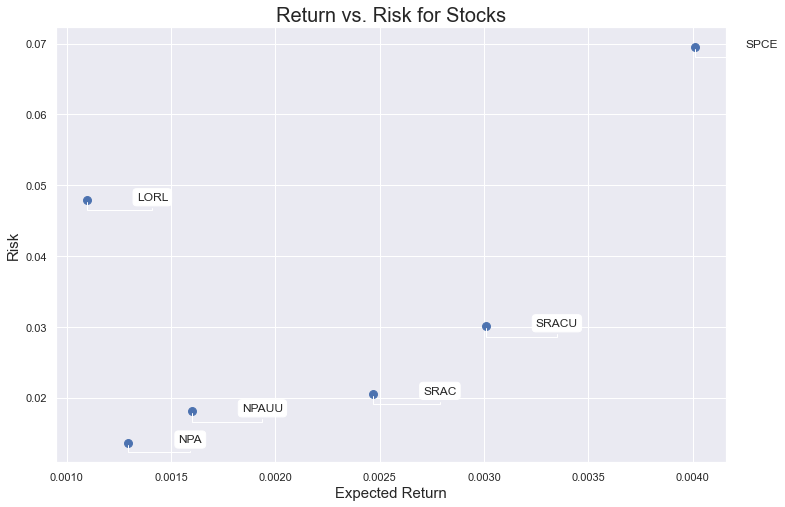

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

SPCE   SPCE     1.000000
NPAUU  NPAUU    1.000000
SRAC   SRAC     1.000000
SRACU  SRACU    1.000000
NPA    NPA      1.000000
LORL   LORL     1.000000
NPAUU  NPA      0.635902
NPA    NPAUU    0.635902
SRAC   SRACU    0.589331
SRACU  SRAC     0.589331
SRAC   NPA      0.292574
NPA    SRAC     0.292574
SPCE   LORL     0.292469
LORL   SPCE     0.292469
NPAUU  SRAC     0.264501
SRAC   NPAUU    0.264501
SPCE   SRAC     0.176258
SRAC   SPCE     0.176258
SPCE   SRACU    0.156968
SRACU  SPCE     0.156968
       NPAUU    0.091144
NPAUU  SRACU    0.091144
NPA    SPCE     0.081423
SPCE   NPA      0.081423
       NPAUU    0.078507
NPAUU  SPCE     0.078507
SRAC   LORL     0.061132
LORL   SRAC     0.061132
SRACU  NPA      0.056923
NPA    SRACU    0.056923
NPAUU  LORL     0.051822
LORL   NPAUU    0.051822
NPA    LORL     0.028718
LORL   NPA      0.028718
SRACU  LORL     0.005697
LORL   SRACU    0.005697
dtype: float64

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
Date,,,,,,
2020-02-04,0.562322,0.427746,0.332415,0.301203,0.348397,0.594719
2020-02-05,0.518373,0.427746,0.345464,0.307256,0.358745,0.374486
2020-02-06,0.552232,0.408715,0.348087,0.307256,0.379482,0.458862
2020-02-07,0.520774,0.432523,0.353324,0.307256,0.358745,0.522074
2020-02-10,0.527332,0.427746,0.345464,0.313315,0.363910,0.650466


In [24]:
Normalized_Value.corr()

,LORL,SRAC,SRACU,NPA,NPAUU,SPCE
LORL,1.000000,0.061132,0.005697,0.028718,0.051822,0.292469
SRAC,0.061132,1.000000,0.589331,0.292574,0.264501,0.176258
SRACU,0.005697,0.589331,1.000000,0.056923,0.091144,0.156968
NPA,0.028718,0.292574,0.056923,1.000000,0.635902,0.081423
NPAUU,0.051822,0.264501,0.091144,0.635902,1.000000,0.078507
SPCE,0.292469,0.176258,0.156968,0.081423,0.078507,1.000000


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

SPCE   SPCE     1.000000
NPAUU  NPAUU    1.000000
SRAC   SRAC     1.000000
SRACU  SRACU    1.000000
NPA    NPA      1.000000
LORL   LORL     1.000000
NPAUU  NPA      0.635902
NPA    NPAUU    0.635902
SRAC   SRACU    0.589331
SRACU  SRAC     0.589331
SRAC   NPA      0.292574
NPA    SRAC     0.292574
SPCE   LORL     0.292469
LORL   SPCE     0.292469
NPAUU  SRAC     0.264501
SRAC   NPAUU    0.264501
SPCE   SRAC     0.176258
SRAC   SPCE     0.176258
SPCE   SRACU    0.156968
SRACU  SPCE     0.156968
       NPAUU    0.091144
NPAUU  SRACU    0.091144
NPA    SPCE     0.081423
SPCE   NPA      0.081423
       NPAUU    0.078507
NPAUU  SPCE     0.078507
SRAC   LORL     0.061132
LORL   SRAC     0.061132
SRACU  NPA      0.056923
NPA    SRACU    0.056923
NPAUU  LORL     0.051822
LORL   NPAUU    0.051822
NPA    LORL     0.028718
LORL   NPA      0.028718
SRACU  LORL     0.005697
LORL   SRACU    0.005697
dtype: float64

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
LORL     0.001095
SRAC     0.002469
SRACU    0.003009
NPA      0.001295
NPAUU    0.001600
SPCE     0.004013
dtype: float64
--------------------------------------------------
Stock risks:
LORL     0.047869
SRAC     0.020524
SRACU    0.030071
NPA      0.013651
NPAUU    0.018064
SPCE     0.069482
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
LORL,0.001095,0.047869
NPA,0.001295,0.013651
NPAUU,0.001600,0.018064
SRAC,0.002469,0.020524
SRACU,0.003009,0.030071
SPCE,0.004013,0.069482


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
NPA,0.001295,0.013651
NPAUU,0.001600,0.018064
SRAC,0.002469,0.020524
SRACU,0.003009,0.030071
LORL,0.001095,0.047869
SPCE,0.004013,0.069482


In [29]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
LORL,0.001095,0.047869,0.001988
SRAC,0.002469,0.020524,0.071561
SRACU,0.003009,0.030071,0.066798
NPA,0.001295,0.013651,0.021647
NPAUU,0.001600,0.018064,0.033192
SPCE,0.004013,0.069482,0.043360


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843


In [34]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387,-0.000123
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498,0.000188
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600,0.000125
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115,0.000145
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380,0.000031
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843,0.000096


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387,-0.000123,-0.008146
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498,0.000188,0.484364
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600,0.000125,0.568444
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115,0.000145,0.234067
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380,0.000031,0.285656
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843,0.000096,0.332181


In [36]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387,-0.000123,-0.008146
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380,0.000031,0.285656
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843,0.000096,0.332181
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600,0.000125,0.568444
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115,0.000145,0.234067
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498,0.000188,0.484364


In [37]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [38]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387,-0.000123,-0.008146,-0.133,-0.056
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115,0.000145,0.234067,-0.036,-0.010
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380,0.000031,0.285656,-0.048,-0.022
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498,0.000188,0.484364,-0.048,-0.016
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600,0.000125,0.568444,-0.081,-0.023
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843,0.000096,0.332181,-0.171,-0.101


In [39]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [40]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
LORL,0.001095,0.047869,0.001988,0.256764,-0.262000,-0.001011,-4.168387,-0.000123,-0.008146,-0.133,-0.056,-0.002158
SRAC,0.002469,0.020524,0.071561,0.121006,-0.090449,0.000000,6.687498,0.000188,0.484364,-0.048,-0.016,0.128287
SRACU,0.003009,0.030071,0.066798,0.244444,-0.129018,0.000000,4.395600,0.000125,0.568444,-0.081,-0.023,0.150556
NPA,0.001295,0.013651,0.021647,0.114341,-0.050714,0.000000,5.118115,0.000145,0.234067,-0.036,-0.010,0.061994
NPAUU,0.001600,0.018064,0.033192,0.119166,-0.066667,0.000000,1.064380,0.000031,0.285656,-0.048,-0.022,0.075658
SPCE,0.004013,0.069482,0.043360,0.258288,-0.235826,-0.001637,3.375843,0.000096,0.332181,-0.171,-0.101,0.087980
